# ***Benford’s Law in Crude Oil Data***

---


"Numbers whisper the truth — we just need to listen closely. Let’s decode the hidden patterns in crude oil data."
— Team Quantum Drill

In this analytical journey, we delve into the fascinating realm of Benford’s Law, applying it to a real-world crude oil dataset to uncover statistical patterns that often go unnoticed.

Benford’s Law reveals that in many naturally occurring datasets, smaller digits appear disproportionately more often as the leading digit. While it might seem counterintuitive, this anomaly is backed by solid mathematical reasoning and has wide-ranging applications — from detecting financial fraud to verifying data authenticity.


---


# **🛢️ Dataset Overview**

Our dataset encompasses a wide array of numerical fields relevant to the global crude oil industry, including:

* Production volumes


* Import/export values

* Consumption statistics

* Price per barrel over time

By extracting the first significant digit from each numerical entry, we aim to determine whether these values conform to the expected logarithmic distribution prescribed by Benford’s Law.


---





# **👨‍💻 Team Details**

📚 Course: Mathematics for Computer Science – II

👨‍🏫 Instructor: Mr. Rishabh Bafna

📌 Project Title: Benford’s Law in Crude Oil Data

👥 Team Name: ALGOMINDS

### **🧑‍🎓 Team Members Name and Email ID:-**

Himanshu Mishra - himanshu.mishra@adypu.edu.in

Harsh Patel - harsh.patel01@adypu.edu.in

Krish Modi - krish.modi@adypu.edu.in

Hirdyansh Kumar - hirdyansh.kumar@adypu.edu.in


---


# 📖 **What is Benford's Law?**

Benford’s Law, also known as the First-Digit Law, states that in many naturally occurring datasets, the probability of a digit
𝑑
d (where
𝑑
∈
{
1
,
2
,
.
.
.
,
9
}
d∈{1,2,...,9}) appearing as the leading digit is given by:

𝑃(𝑑) =
log10
(
1
+
1/𝑑)


This means:

* **1** appears as the leading digit about 30.1% of the time

* **2** appears about 17.6%

* **3** about 12.5%

* … down to 9, which appears less than 5%

This logarithmic distribution emerges in datasets that span multiple orders of magnitude — making economic and industrial data (like crude oil statistics) ideal candidates for analysis.


---



# **🎯 Objective**

Our primary objective is to examine whether the leading digit distribution of our crude oil dataset aligns with Benford’s Law.

**We aim to:**

📊 Visualize the frequency distribution of leading digits and compare it with Benford’s expected distribution

📉 Identify deviations (if any) and analyze their significance

🧪 Optionally conduct goodness-of-fit tests (like Chi-square) to quantitatively measure adherence to Benford’s Law

---


This project not only helps in understanding the curious nature of numbers but also showcases the practical utility of mathematical laws in validating real-world data.

---




In [312]:
import pandas as pd
import numpy as np
url = 'https://drive.google.com/uc?export=download&id=1l-Cngffqz6pJfYG9_0-UvqYitdf0PWv5'
df = pd.read_csv(url)

print(df.head())


   Month  Year   PRODUCTS   TRADE  Quantity (000 Metric Tonnes)  \
0  April  2024  CRUDE OIL  Import                      21439.18   
1  April  2024        LPG  Import                       1570.75   
2  April  2024         MS  Import                         29.99   
3  April  2024    Naphtha  Import                        121.22   
4  April  2024        ATF  Import                          0.00   

   Value in Rupees (Crore)  Value in Dollars (Million US dollar)  \
0                108423.34                              12992.66   
1                  8005.70                                959.87   
2                   224.85                                 26.97   
3                   735.58                                 88.19   
4                     0.02                                  0.00   

          date_updated  
0  2025-04-26 04:00:34  
1  2025-04-26 04:00:34  
2  2025-04-26 04:00:34  
3  2025-04-26 04:00:34  
4  2025-04-26 04:00:34  


In [313]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [314]:
print("\n--- Dataset Info ---")
print(df.info())


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Month                                 532 non-null    object 
 1   Year                                  532 non-null    int64  
 2   PRODUCTS                              532 non-null    object 
 3   TRADE                                 532 non-null    object 
 4   Quantity (000 Metric Tonnes)          489 non-null    float64
 5   Value in Rupees (Crore)               489 non-null    float64
 6   Value in Dollars (Million US dollar)  489 non-null    float64
 7   date_updated                          532 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 33.4+ KB
None


In [315]:
print("\n--- First 5 Rows ---")
print(df.head())


--- First 5 Rows ---
   Month  Year   PRODUCTS   TRADE  Quantity (000 Metric Tonnes)  \
0  April  2024  CRUDE OIL  Import                      21439.18   
1  April  2024        LPG  Import                       1570.75   
2  April  2024         MS  Import                         29.99   
3  April  2024    Naphtha  Import                        121.22   
4  April  2024        ATF  Import                          0.00   

   Value in Rupees (Crore)  Value in Dollars (Million US dollar)  \
0                108423.34                              12992.66   
1                  8005.70                                959.87   
2                   224.85                                 26.97   
3                   735.58                                 88.19   
4                     0.02                                  0.00   

          date_updated  
0  2025-04-26 04:00:34  
1  2025-04-26 04:00:34  
2  2025-04-26 04:00:34  
3  2025-04-26 04:00:34  
4  2025-04-26 04:00:34  


In [316]:
df.describe()

,Year,Quantity (000 Metric Tonnes),Value in Rupees (Crore),Value in Dollars (Million US dollar)
count,532.000000,489.000000,489.000000,489.000000
mean,2023.543233,3309.092147,15458.694826,1857.170941
std,0.498596,6701.983616,30716.954459,3688.391630
min,2023.000000,0.000000,0.020000,0.000000
25%,2023.000000,54.480000,308.250000,37.550000
50%,2024.000000,375.250000,1640.080000,196.370000
75%,2024.000000,1908.680000,9523.920000,1143.730000
max,2024.000000,26407.210000,129174.880000,15477.590000


In [317]:
print("\n--- Summary Statistics ---")
print(df.describe(include='all'))


--- Summary Statistics ---
        Month         Year PRODUCTS   TRADE  Quantity (000 Metric Tonnes)  \
count     532   532.000000      532     532                    489.000000   
unique     12          NaN       23       2                           NaN   
top     April          NaN      LPG  Export                           NaN   
freq       53          NaN       40     272                           NaN   
mean      NaN  2023.543233      NaN     NaN                   3309.092147   
std       NaN     0.498596      NaN     NaN                   6701.983616   
min       NaN  2023.000000      NaN     NaN                      0.000000   
25%       NaN  2023.000000      NaN     NaN                     54.480000   
50%       NaN  2024.000000      NaN     NaN                    375.250000   
75%       NaN  2024.000000      NaN     NaN                   1908.680000   
max       NaN  2024.000000      NaN     NaN                  26407.210000   

        Value in Rupees (Crore)  Value in Dolla

In [318]:
df.head(10)

,Month,Year,PRODUCTS,TRADE,Quantity (000 Metric Tonnes),Value in Rupees (Crore),Value in Dollars (Million US dollar),date_updated
0,April,2024,CRUDE OIL,Import,21439.18,108423.34,12992.66,2025-04-26 04:00:34
1,April,2024,LPG,Import,1570.75,8005.70,959.87,2025-04-26 04:00:34
2,April,2024,MS,Import,29.99,224.85,26.97,2025-04-26 04:00:34
3,April,2024,Naphtha,Import,121.22,735.58,88.19,2025-04-26 04:00:34
4,April,2024,ATF,Import,0.00,0.02,0.00,2025-04-26 04:00:34
5,April,2024,HSD,Import,1.75,11.46,1.37,2025-04-26 04:00:34
6,April,2024,LOBS/ Lube oil,Import,284.54,2191.06,262.64,2025-04-26 04:00:34
7,April,2024,Fuel Oil,Import,791.92,3257.57,390.72,2025-04-26 04:00:34
8,April,2024,Bitumen,Import,274.25,857.49,102.81,2025-04-26 04:00:34
9,April,2024,Petcoke,Import,1026.11,1046.45,125.47,2025-04-26 04:00:34


In [319]:
df.tail()

,Month,Year,PRODUCTS,TRADE,Quantity (000 Metric Tonnes),Value in Rupees (Crore),Value in Dollars (Million US dollar),date_updated
527,March,2024,Bitumen,Export,2.47,10.02,1.21,2025-04-26 04:00:34
528,March,2024,Petcoke / CBFS,Export,NaN,NaN,NaN,2025-04-26 04:00:34
529,March,2024,Others%,Export,300.89,1625.65,196.37,2025-04-26 04:00:34
530,March,2024,TOTAL PRODUCT EXPORT,Export,5672.60,35623.12,4288.69,2025-04-26 04:00:34
531,March,2024,NET IMPORT,Export,19494.93,80932.31,9723.56,2025-04-26 04:00:34


In [320]:
df.tail(10)

,Month,Year,PRODUCTS,TRADE,Quantity (000 Metric Tonnes),Value in Rupees (Crore),Value in Dollars (Million US dollar),date_updated
522,March,2024,SKO,Export,0.92,7.07,0.85,2025-04-26 04:00:34
523,March,2024,HSD,Export,2435.69,15292.78,1840.83,2025-04-26 04:00:34
524,March,2024,LDO,Export,NaN,NaN,NaN,2025-04-26 04:00:34
525,March,2024,LOBS/ Lube Oil,Export,2.25,34.61,4.09,2025-04-26 04:00:34
526,March,2024,Fuel Oil,Export,255.95,990.20,119.04,2025-04-26 04:00:34
527,March,2024,Bitumen,Export,2.47,10.02,1.21,2025-04-26 04:00:34
528,March,2024,Petcoke / CBFS,Export,NaN,NaN,NaN,2025-04-26 04:00:34
529,March,2024,Others%,Export,300.89,1625.65,196.37,2025-04-26 04:00:34
530,March,2024,TOTAL PRODUCT EXPORT,Export,5672.60,35623.12,4288.69,2025-04-26 04:00:34
531,March,2024,NET IMPORT,Export,19494.93,80932.31,9723.56,2025-04-26 04:00:34


In [321]:
len(df)

532

In [322]:
df.shape[0]

532

In [323]:
df["PRODUCTS"].unique()

array(['CRUDE OIL', 'LPG', 'MS', 'Naphtha', 'ATF', 'HSD',
       'LOBS/ Lube oil', 'Fuel Oil', 'Bitumen', 'Petcoke', 'Others&',
       'PRODUCT IMPORT*', 'TOTAL IMPORT', 'MS!', 'Naphtha$', 'ATF#',
       'SKO', 'LOBS/ Lube Oil', 'Petcoke / CBFS', 'Others%',
       'TOTAL  PRODUCT EXPORT', 'NET IMPORT', 'LDO'], dtype=object)

In [324]:
len(df["PRODUCTS"].unique())

23

In [325]:
df["PRODUCTS"].value_counts()

,count
PRODUCTS,
LPG,40
HSD,40
Fuel Oil,40
Bitumen,40
Naphtha,20
MS,20
CRUDE OIL,20
LOBS/ Lube oil,20
ATF,20


In [326]:
df.columns

Index(['Month', 'Year', 'PRODUCTS', 'TRADE', 'Quantity (000 Metric Tonnes)',
       'Value in Rupees (Crore)', 'Value in Dollars (Million US dollar)',
       'date_updated'],
      dtype='object')

In [327]:
df.keys()

Index(['Month', 'Year', 'PRODUCTS', 'TRADE', 'Quantity (000 Metric Tonnes)',
       'Value in Rupees (Crore)', 'Value in Dollars (Million US dollar)',
       'date_updated'],
      dtype='object')

In [328]:
df["PRODUCTS"]

,PRODUCTS
0,CRUDE OIL
1,LPG
2,MS
3,Naphtha
4,ATF
...,...
527,Bitumen
528,Petcoke / CBFS
529,Others%
530,TOTAL PRODUCT EXPORT


In [329]:
len(df["PRODUCTS"] == "LPG")

532

In [330]:
sum(df["PRODUCTS"] == "LPG")

40

In [331]:
df[["PRODUCTS","TRADE"]]

,PRODUCTS,TRADE
0,CRUDE OIL,Import
1,LPG,Import
2,MS,Import
3,Naphtha,Import
4,ATF,Import
...,...,...
527,Bitumen,Export
528,Petcoke / CBFS,Export
529,Others%,Export
530,TOTAL PRODUCT EXPORT,Export


In [332]:
df["Value in Rupees (Crore)"]

,Value in Rupees (Crore)
0,108423.34
1,8005.70
2,224.85
3,735.58
4,0.02
...,...
527,10.02
528,NaN
529,1625.65
530,35623.12


In [333]:
df["Value in Rupees (Crore)"].mean()

np.float64(15458.694826175868)

In [334]:
df["Value in Rupees (Crore)"].median()

1640.08

In [335]:
df["Value in Rupees (Crore)"].mode()

,Value in Rupees (Crore)
0,0.02
1,0.06


In [336]:
value = 0
for cost in df["Value in Rupees (Crore)"]:
  if cost >= 1000:
    value += 1
print(value)

296


In [337]:
filtered_df = df[(df["TRADE"] == "Export") & (df["Value in Rupees (Crore)"] >= 10000)]

df

,Month,Year,PRODUCTS,TRADE,Quantity (000 Metric Tonnes),Value in Rupees (Crore),Value in Dollars (Million US dollar),date_updated
0,April,2024,CRUDE OIL,Import,21439.18,108423.34,12992.66,2025-04-26 04:00:34
1,April,2024,LPG,Import,1570.75,8005.70,959.87,2025-04-26 04:00:34
2,April,2024,MS,Import,29.99,224.85,26.97,2025-04-26 04:00:34
3,April,2024,Naphtha,Import,121.22,735.58,88.19,2025-04-26 04:00:34
4,April,2024,ATF,Import,0.00,0.02,0.00,2025-04-26 04:00:34
...,...,...,...,...,...,...,...,...
527,March,2024,Bitumen,Export,2.47,10.02,1.21,2025-04-26 04:00:34
528,March,2024,Petcoke / CBFS,Export,NaN,NaN,NaN,2025-04-26 04:00:34
529,March,2024,Others%,Export,300.89,1625.65,196.37,2025-04-26 04:00:34
530,March,2024,TOTAL PRODUCT EXPORT,Export,5672.60,35623.12,4288.69,2025-04-26 04:00:34


In [338]:
print(df["Quantity (000 Metric Tonnes)"].sum())

1618146.06


In [339]:
df["Cost_per_metric_tonne"] = df["Value in Rupees (Crore)"] / df["Quantity (000 Metric Tonnes)"]
df

,Month,Year,PRODUCTS,TRADE,Quantity (000 Metric Tonnes),Value in Rupees (Crore),Value in Dollars (Million US dollar),date_updated,Cost_per_metric_tonne
0,April,2024,CRUDE OIL,Import,21439.18,108423.34,12992.66,2025-04-26 04:00:34,5.057252
1,April,2024,LPG,Import,1570.75,8005.70,959.87,2025-04-26 04:00:34,5.096737
2,April,2024,MS,Import,29.99,224.85,26.97,2025-04-26 04:00:34,7.497499
3,April,2024,Naphtha,Import,121.22,735.58,88.19,2025-04-26 04:00:34,6.068141
4,April,2024,ATF,Import,0.00,0.02,0.00,2025-04-26 04:00:34,inf
...,...,...,...,...,...,...,...,...,...
527,March,2024,Bitumen,Export,2.47,10.02,1.21,2025-04-26 04:00:34,4.056680
528,March,2024,Petcoke / CBFS,Export,NaN,NaN,NaN,2025-04-26 04:00:34,NaN
529,March,2024,Others%,Export,300.89,1625.65,196.37,2025-04-26 04:00:34,5.402805
530,March,2024,TOTAL PRODUCT EXPORT,Export,5672.60,35623.12,4288.69,2025-04-26 04:00:34,6.279858


In [340]:
df.iloc[[-1]]

,Month,Year,PRODUCTS,TRADE,Quantity (000 Metric Tonnes),Value in Rupees (Crore),Value in Dollars (Million US dollar),date_updated,Cost_per_metric_tonne
531,March,2024,NET IMPORT,Export,19494.93,80932.31,9723.56,2025-04-26 04:00:34,4.151454


In [341]:
df[df['PRODUCTS'] == 'LPG']

,Month,Year,PRODUCTS,TRADE,Quantity (000 Metric Tonnes),Value in Rupees (Crore),Value in Dollars (Million US dollar),date_updated,Cost_per_metric_tonne
1,April,2024,LPG,Import,1570.75,8005.70,959.87,2025-04-26 04:00:34,5.096737
13,April,2024,LPG,Export,44.46,294.22,35.29,2025-04-26 04:00:34,6.617634
27,May,2024,LPG,Import,1696.26,8192.56,982.18,2025-04-26 04:00:34,4.829778
39,May,2024,LPG,Export,43.56,285.32,34.16,2025-04-26 04:00:34,6.550046
53,June,2024,LPG,Import,1323.33,6289.11,753.43,2025-04-26 04:00:34,4.752488
65,June,2024,LPG,Export,45.68,285.88,34.25,2025-04-26 04:00:34,6.258319
79,July,2024,LPG,Import,1821.60,8649.28,1034.82,2025-04-26 04:00:34,4.748177
91,July,2024,LPG,Export,44.60,272.96,32.62,2025-04-26 04:00:34,6.120179
105,August,2024,LPG,Import,1774.75,8608.90,1026.14,2025-04-26 04:00:34,4.850768
117,August,2024,LPG,Export,43.88,271.91,32.41,2025-04-26 04:00:34,6.196673


In [342]:
df[df["Value in Rupees (Crore)"] <= 1000]

,Month,Year,PRODUCTS,TRADE,Quantity (000 Metric Tonnes),Value in Rupees (Crore),Value in Dollars (Million US dollar),date_updated,Cost_per_metric_tonne
2,April,2024,MS,Import,29.99,224.85,26.97,2025-04-26 04:00:34,7.497499
3,April,2024,Naphtha,Import,121.22,735.58,88.19,2025-04-26 04:00:34,6.068141
4,April,2024,ATF,Import,0.00,0.02,0.00,2025-04-26 04:00:34,inf
5,April,2024,HSD,Import,1.75,11.46,1.37,2025-04-26 04:00:34,6.548571
8,April,2024,Bitumen,Import,274.25,857.49,102.81,2025-04-26 04:00:34,3.126673
...,...,...,...,...,...,...,...,...,...
518,March,2024,LPG,Export,47.98,324.56,39.11,2025-04-26 04:00:34,6.764485
522,March,2024,SKO,Export,0.92,7.07,0.85,2025-04-26 04:00:34,7.684783
525,March,2024,LOBS/ Lube Oil,Export,2.25,34.61,4.09,2025-04-26 04:00:34,15.382222
526,March,2024,Fuel Oil,Export,255.95,990.20,119.04,2025-04-26 04:00:34,3.868724


In [343]:
df[(df['PRODUCTS'] == 'LPG') & (df["Value in Rupees (Crore)"] <= 250)]

,Month,Year,PRODUCTS,TRADE,Quantity (000 Metric Tonnes),Value in Rupees (Crore),Value in Dollars (Million US dollar),date_updated,Cost_per_metric_tonne
275,June,2023,LPG,Export,41.22,237.99,28.96,2025-04-26 04:00:34,5.773654
302,July,2023,LPG,Export,41.14,208.59,25.40,2025-04-26 04:00:34,5.070248
329,August,2023,LPG,Export,46.63,212.21,25.64,2025-04-26 04:00:34,4.550933
356,September,2023,LPG,Export,39.50,211.01,25.43,2025-04-26 04:00:34,5.342025


In [344]:
df[df["PRODUCTS"].str.contains("LP")]

,Month,Year,PRODUCTS,TRADE,Quantity (000 Metric Tonnes),Value in Rupees (Crore),Value in Dollars (Million US dollar),date_updated,Cost_per_metric_tonne
1,April,2024,LPG,Import,1570.75,8005.70,959.87,2025-04-26 04:00:34,5.096737
13,April,2024,LPG,Export,44.46,294.22,35.29,2025-04-26 04:00:34,6.617634
27,May,2024,LPG,Import,1696.26,8192.56,982.18,2025-04-26 04:00:34,4.829778
39,May,2024,LPG,Export,43.56,285.32,34.16,2025-04-26 04:00:34,6.550046
53,June,2024,LPG,Import,1323.33,6289.11,753.43,2025-04-26 04:00:34,4.752488
65,June,2024,LPG,Export,45.68,285.88,34.25,2025-04-26 04:00:34,6.258319
79,July,2024,LPG,Import,1821.60,8649.28,1034.82,2025-04-26 04:00:34,4.748177
91,July,2024,LPG,Export,44.60,272.96,32.62,2025-04-26 04:00:34,6.120179
105,August,2024,LPG,Import,1774.75,8608.90,1026.14,2025-04-26 04:00:34,4.850768
117,August,2024,LPG,Export,43.88,271.91,32.41,2025-04-26 04:00:34,6.196673


In [345]:
df[df["Month"].str.contains("Ap")]

,Month,Year,PRODUCTS,TRADE,Quantity (000 Metric Tonnes),Value in Rupees (Crore),Value in Dollars (Million US dollar),date_updated,Cost_per_metric_tonne
0,April,2024,CRUDE OIL,Import,21439.18,108423.34,12992.66,2025-04-26 04:00:34,5.057252
1,April,2024,LPG,Import,1570.75,8005.70,959.87,2025-04-26 04:00:34,5.096737
2,April,2024,MS,Import,29.99,224.85,26.97,2025-04-26 04:00:34,7.497499
3,April,2024,Naphtha,Import,121.22,735.58,88.19,2025-04-26 04:00:34,6.068141
4,April,2024,ATF,Import,0.00,0.02,0.00,2025-04-26 04:00:34,inf
5,April,2024,HSD,Import,1.75,11.46,1.37,2025-04-26 04:00:34,6.548571
6,April,2024,LOBS/ Lube oil,Import,284.54,2191.06,262.64,2025-04-26 04:00:34,7.700358
7,April,2024,Fuel Oil,Import,791.92,3257.57,390.72,2025-04-26 04:00:34,4.113509
8,April,2024,Bitumen,Import,274.25,857.49,102.81,2025-04-26 04:00:34,3.126673
9,April,2024,Petcoke,Import,1026.11,1046.45,125.47,2025-04-26 04:00:34,1.019822


In [346]:
type(np.nan)

float

In [347]:
df.sort_values(by=['Quantity (000 Metric Tonnes)', 'Value in Rupees (Crore)'], ascending=[True, False])


,Month,Year,PRODUCTS,TRADE,Quantity (000 Metric Tonnes),Value in Rupees (Crore),Value in Dollars (Million US dollar),date_updated,Cost_per_metric_tonne
507,March,2024,MS,Import,0.0,0.25,0.03,2025-04-26 04:00:34,inf
237,May,2023,MS,Import,0.0,0.24,0.03,2025-04-26 04:00:34,inf
210,April,2023,MS,Import,0.0,0.16,0.02,2025-04-26 04:00:34,inf
54,June,2024,MS,Import,0.0,0.13,0.02,2025-04-26 04:00:34,inf
82,July,2024,ATF,Import,0.0,0.06,0.01,2025-04-26 04:00:34,inf
...,...,...,...,...,...,...,...,...,...
497,February,2024,LDO,Export,NaN,NaN,NaN,2025-04-26 04:00:34,NaN
501,February,2024,Petcoke / CBFS,Export,NaN,NaN,NaN,2025-04-26 04:00:34,NaN
509,March,2024,ATF,Import,NaN,NaN,NaN,2025-04-26 04:00:34,NaN
524,March,2024,LDO,Export,NaN,NaN,NaN,2025-04-26 04:00:34,NaN


In [348]:
# Sorts the column Products in ascending order
df.sort_values(by='PRODUCTS', ascending=True)

,Month,Year,PRODUCTS,TRADE,Quantity (000 Metric Tonnes),Value in Rupees (Crore),Value in Dollars (Million US dollar),date_updated,Cost_per_metric_tonne
56,June,2024,ATF,Import,NaN,NaN,NaN,2025-04-26 04:00:34,NaN
509,March,2024,ATF,Import,NaN,NaN,NaN,2025-04-26 04:00:34,NaN
374,October,2023,ATF,Import,NaN,NaN,NaN,2025-04-26 04:00:34,NaN
108,August,2024,ATF,Import,0.01,0.06,0.01,2025-04-26 04:00:34,6.000000
212,April,2023,ATF,Import,NaN,NaN,NaN,2025-04-26 04:00:34,NaN
...,...,...,...,...,...,...,...,...,...
274,June,2023,TOTAL IMPORT,Import,23656.18,97349.36,11836.18,2025-04-26 04:00:34,4.115177
90,July,2024,TOTAL IMPORT,Import,24340.19,113723.07,13581.33,2025-04-26 04:00:34,4.672234
64,June,2024,TOTAL IMPORT,Import,22426.16,107734.34,12888.71,2025-04-26 04:00:34,4.803958
517,March,2024,TOTAL IMPORT,Import,25167.54,116555.43,14012.25,2025-04-26 04:00:34,4.631181


In [349]:
df.sort_values(by='Value in Rupees (Crore)', ascending=False).head(5) # TOP 5 Expensive Products

,Month,Year,PRODUCTS,TRADE,Quantity (000 Metric Tonnes),Value in Rupees (Crore),Value in Dollars (Million US dollar),date_updated,Cost_per_metric_tonne
38,May,2024,TOTAL IMPORT,Import,26407.21,129174.88,15477.59,2025-04-26 04:00:34,4.891652
12,April,2024,TOTAL IMPORT,Import,25755.19,125954.86,15094.67,2025-04-26 04:00:34,4.890465
382,October,2023,TOTAL IMPORT,Import,23277.28,118718.71,14262.46,2025-04-26 04:00:34,5.100197
463,January,2024,TOTAL IMPORT,Import,25343.51,116932.31,14056.89,2025-04-26 04:00:34,4.613896
517,March,2024,TOTAL IMPORT,Import,25167.54,116555.43,14012.25,2025-04-26 04:00:34,4.631181


In [350]:
# df.dropna()

In [351]:
# 4. Check for null values
print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Missing Values ---
Month                                    0
Year                                     0
PRODUCTS                                 0
TRADE                                    0
Quantity (000 Metric Tonnes)            43
Value in Rupees (Crore)                 43
Value in Dollars (Million US dollar)    43
date_updated                             0
Cost_per_metric_tonne                   43
dtype: int64


In [352]:
# 5. Data types
print("\n--- Data Types ---")
print(df.dtypes)


--- Data Types ---
Month                                    object
Year                                      int64
PRODUCTS                                 object
TRADE                                    object
Quantity (000 Metric Tonnes)            float64
Value in Rupees (Crore)                 float64
Value in Dollars (Million US dollar)    float64
date_updated                             object
Cost_per_metric_tonne                   float64
dtype: object


In [353]:
# 6. Shape of the dataset
print("\n--- Shape ---")
print(df.shape)


--- Shape ---
(532, 9)


In [354]:
# 7. Unique values per column
print("\n--- Unique Values ---")
print(df.nunique())


--- Unique Values ---
Month                                    12
Year                                      2
PRODUCTS                                 23
TRADE                                     2
Quantity (000 Metric Tonnes)            472
Value in Rupees (Crore)                 487
Value in Dollars (Million US dollar)    472
date_updated                              1
Cost_per_metric_tonne                   481
dtype: int64



--- Correlation Heatmap ---


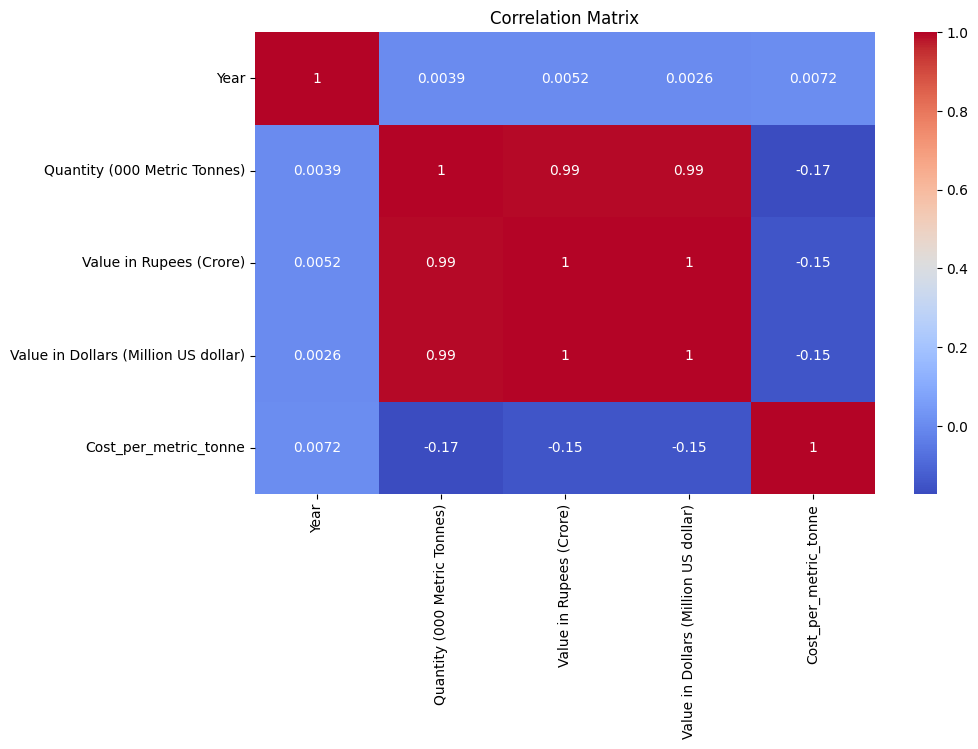

In [355]:
# 8. Correlation heatmap (for numerical columns)
print("\n--- Correlation Heatmap ---")
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

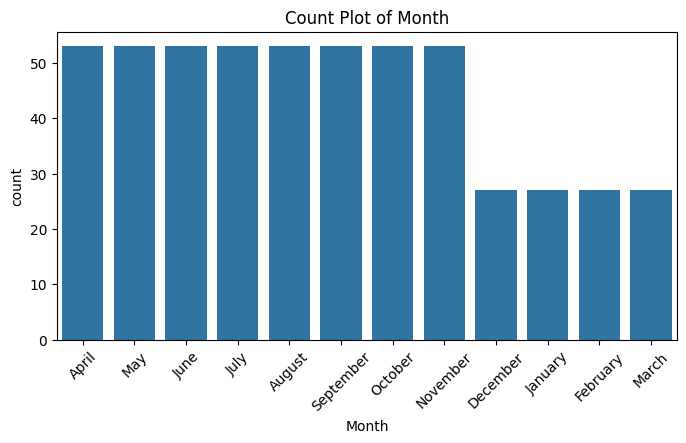

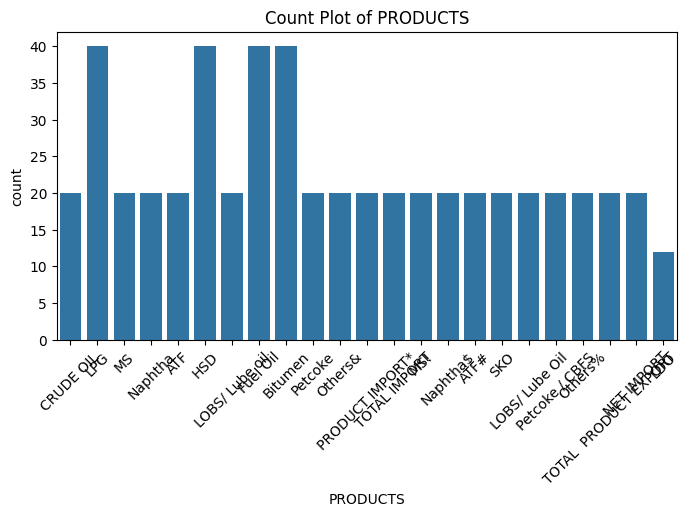

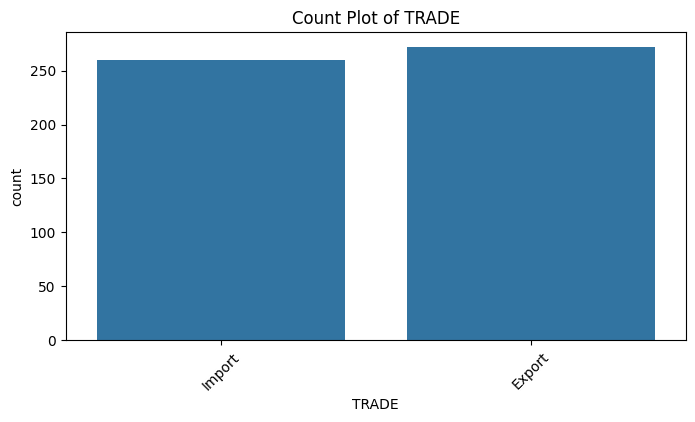

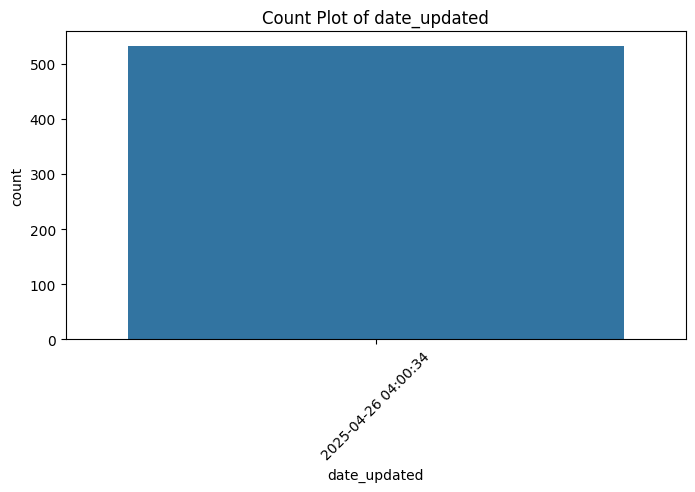

In [356]:
# 9. Count plots for categorical features (if any)
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.show()

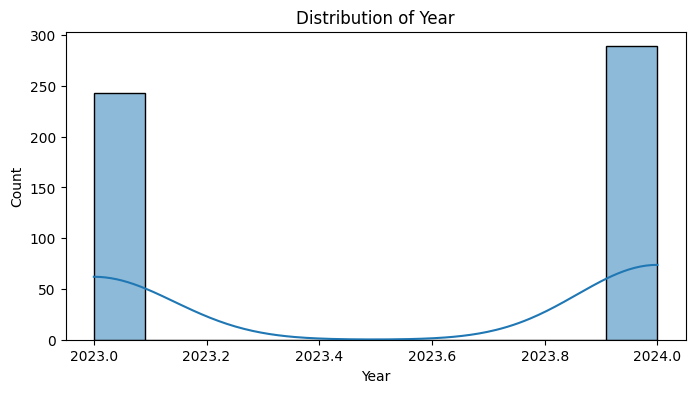

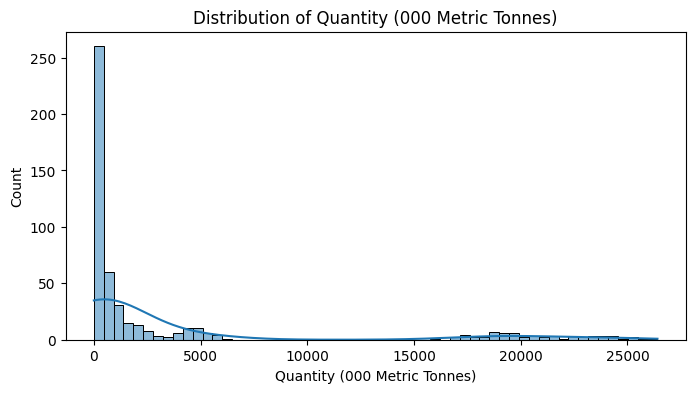

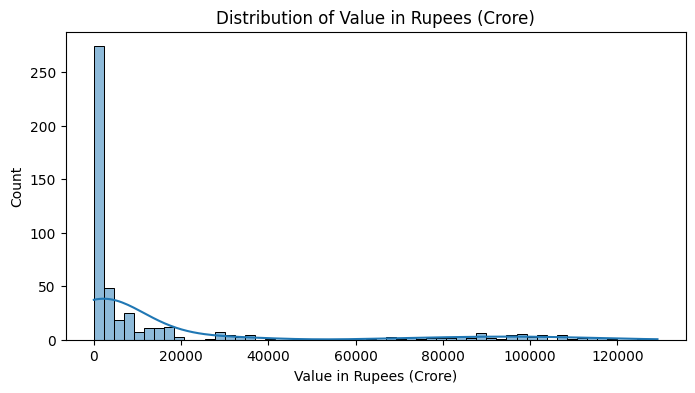

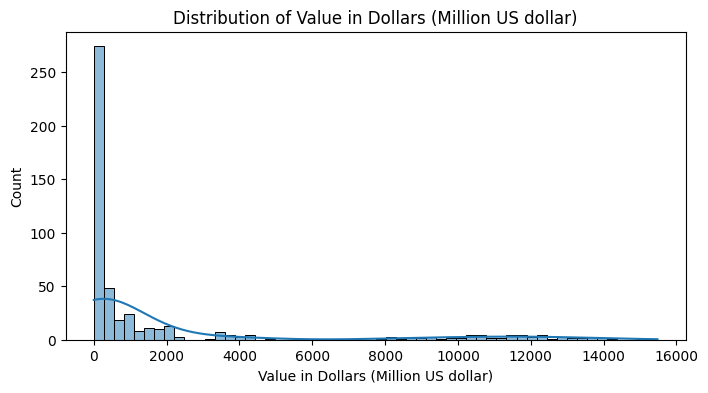

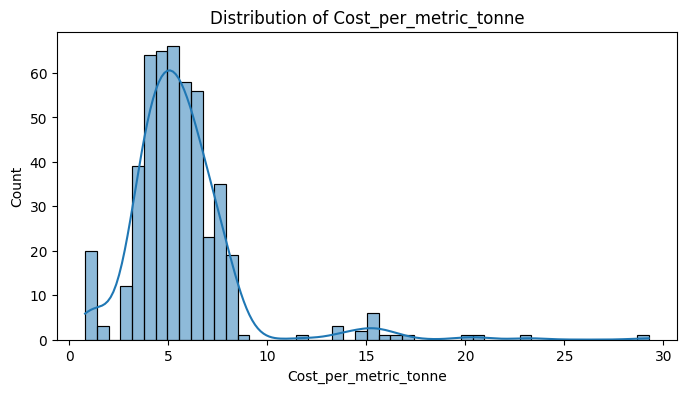

In [357]:
# 10. Distribution of numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [358]:
import missingno as msno

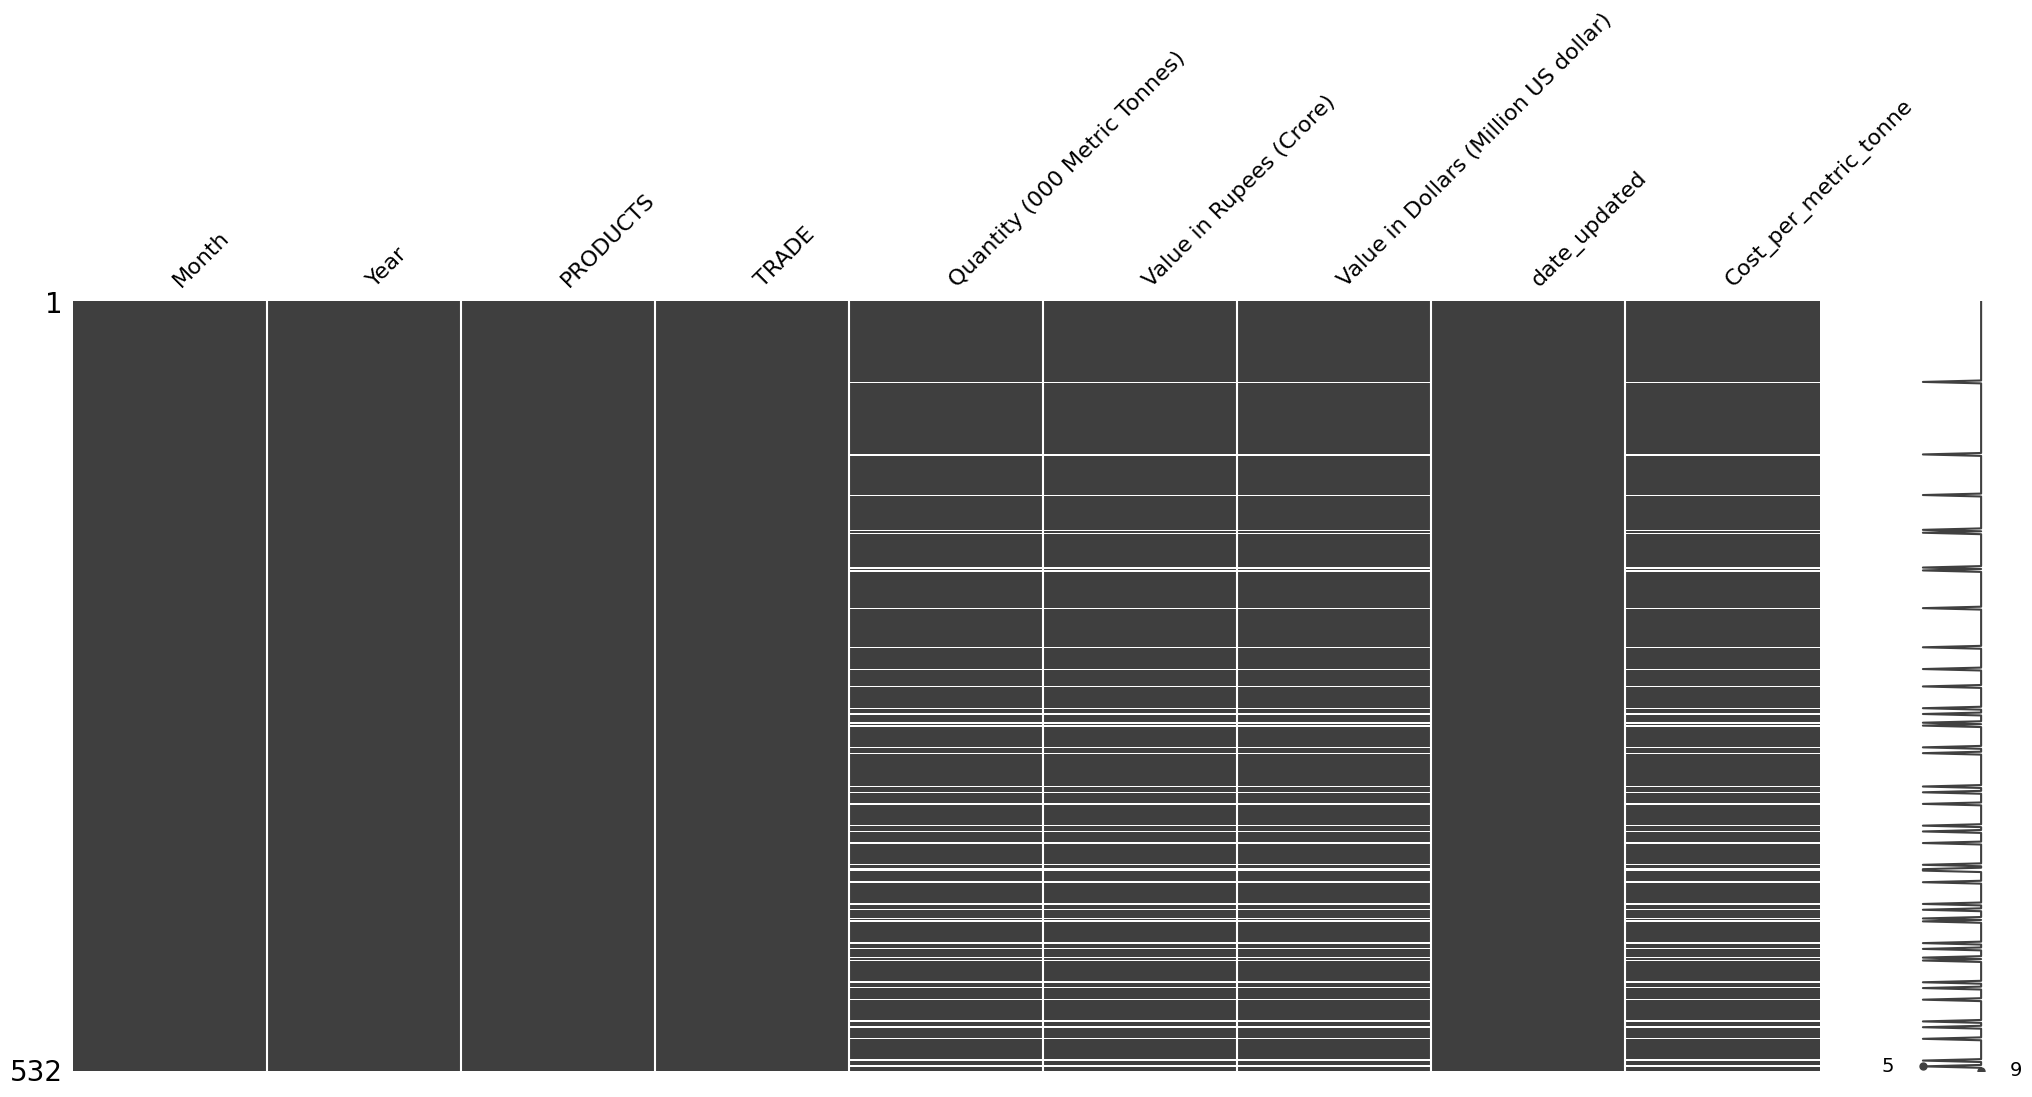

In [359]:
# Visualize missing values matrix
msno.matrix(df)
plt.show()

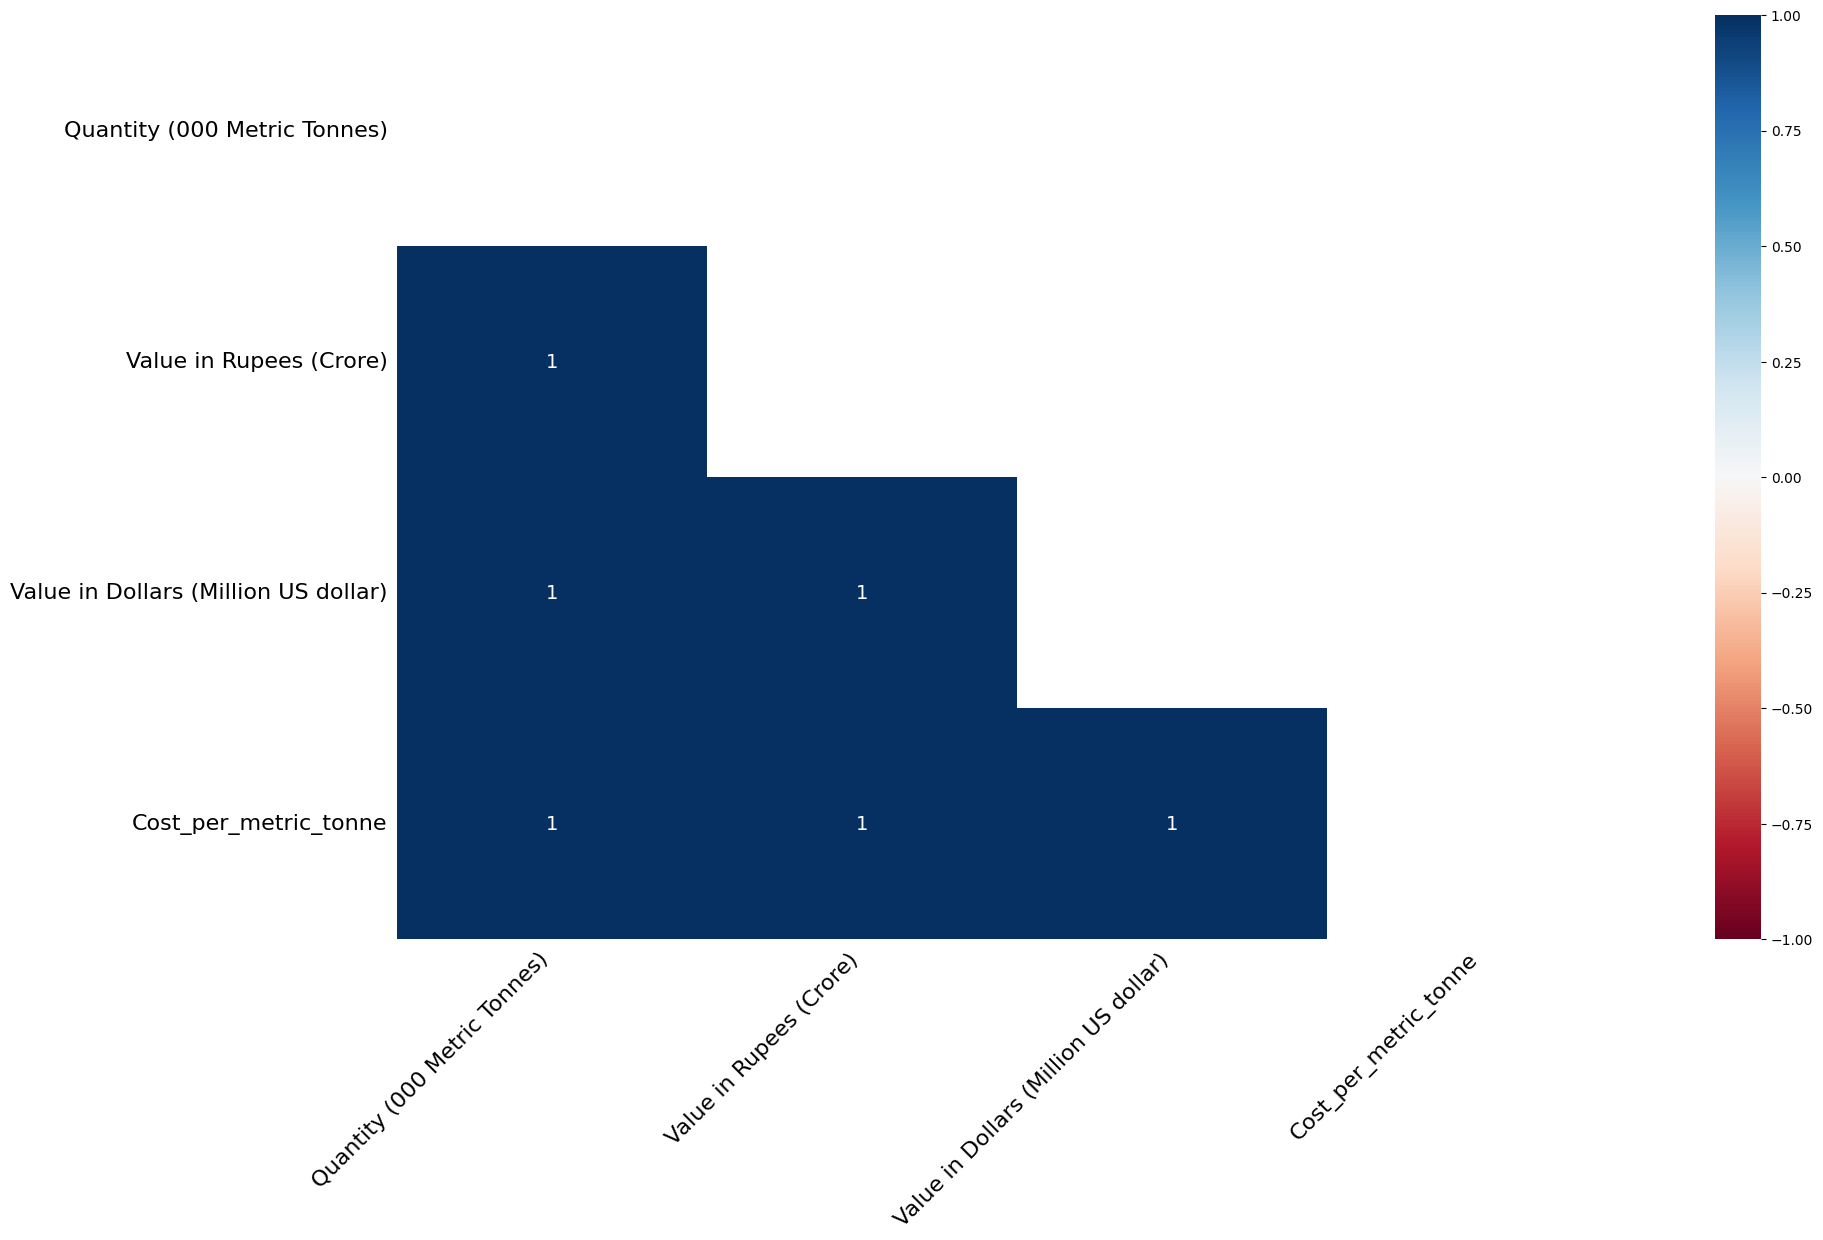

In [360]:
# Heatmap for nulls
msno.heatmap(df)
plt.show()

In [361]:
from scipy import stats
import numpy as np

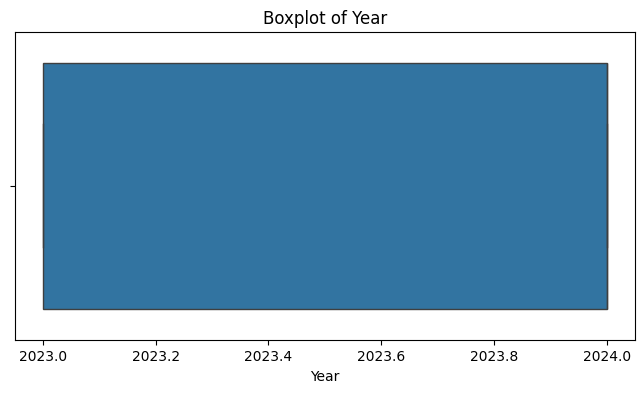

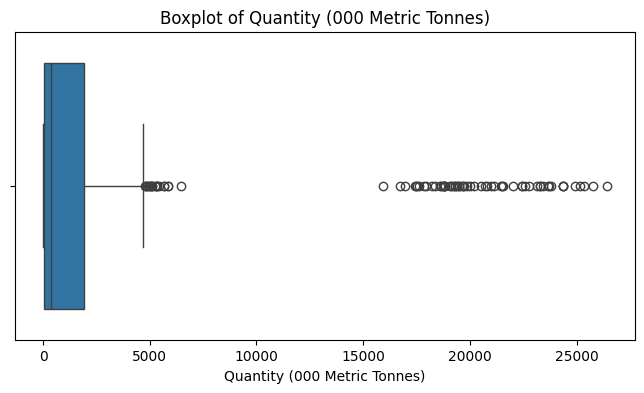

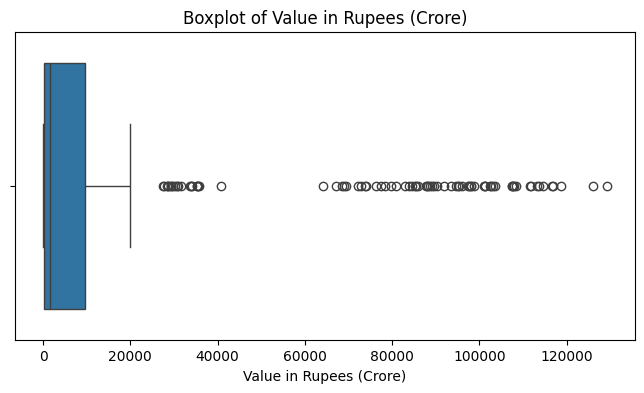

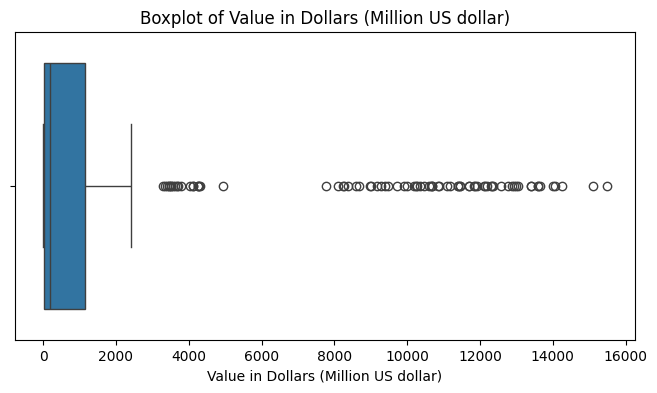

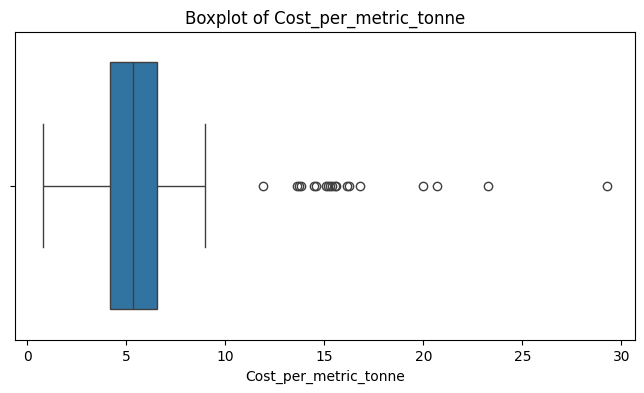

In [362]:
# Boxplot for numerical columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [363]:
# Get numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Calculate z-scores for each numeric column
z_scores = np.abs(stats.zscore(df[numeric_cols], nan_policy='omit'))

# If z_scores is 1D (only one column), reshape it
if len(numeric_cols) == 1:
    z_scores = z_scores.reshape(-1, 1)

# Count outliers per column
outlier_counts = {}
for i, col in enumerate(numeric_cols):
    outlier_counts[col] = (z_scores[:, i] > 3).sum()

# Print result
print("\n--- Number of Outliers Detected (Z-score > 3) ---")
print(outlier_counts)


--- Number of Outliers Detected (Z-score > 3) ---
{'Year': np.int64(0), 'Quantity (000 Metric Tonnes)': np.int64(12), 'Value in Rupees (Crore)': np.int64(13), 'Value in Dollars (Million US dollar)': np.int64(13), 'Cost_per_metric_tonne': np.int64(0)}


/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:1127: RuntimeWarning:

invalid value encountered in subtract



In [364]:
print("\n--- Skewness ---")
print(df[numeric_cols].skew())


--- Skewness ---
Year                                   -0.174074
Quantity (000 Metric Tonnes)            2.239134
Value in Rupees (Crore)                 2.235922
Value in Dollars (Million US dollar)    2.233876
Cost_per_metric_tonne                        NaN
dtype: float64


/usr/local/lib/python3.11/dist-packages/pandas/core/nanops.py:1256: RuntimeWarning:

invalid value encountered in subtract



In [365]:
print("\n--- Kurtosis ---")
print(df[numeric_cols].kurtosis())


--- Kurtosis ---
Year                                   -1.977145
Quantity (000 Metric Tonnes)            3.447083
Value in Rupees (Crore)                 3.592410
Value in Dollars (Million US dollar)    3.580776
Cost_per_metric_tonne                        NaN
dtype: float64


/usr/local/lib/python3.11/dist-packages/pandas/core/nanops.py:1344: RuntimeWarning:

invalid value encountered in subtract



In [366]:
for col in categorical_cols:
    print(f"\n--- Value Counts for {col} ---")
    print(df[col].value_counts())



--- Value Counts for Month ---
Month
April        53
May          53
June         53
July         53
August       53
September    53
October      53
November     53
December     27
January      27
February     27
March        27
Name: count, dtype: int64

--- Value Counts for PRODUCTS ---
PRODUCTS
LPG                      40
HSD                      40
Fuel Oil                 40
Bitumen                  40
Naphtha                  20
MS                       20
CRUDE OIL                20
LOBS/ Lube oil           20
ATF                      20
Petcoke                  20
Others&                  20
PRODUCT IMPORT*          20
TOTAL IMPORT             20
MS!                      20
Naphtha$                 20
ATF#                     20
SKO                      20
LOBS/ Lube Oil           20
Petcoke / CBFS           20
Others%                  20
TOTAL  PRODUCT EXPORT    20
NET IMPORT               20
LDO                      12
Name: count, dtype: int64

--- Value Counts for TRADE --

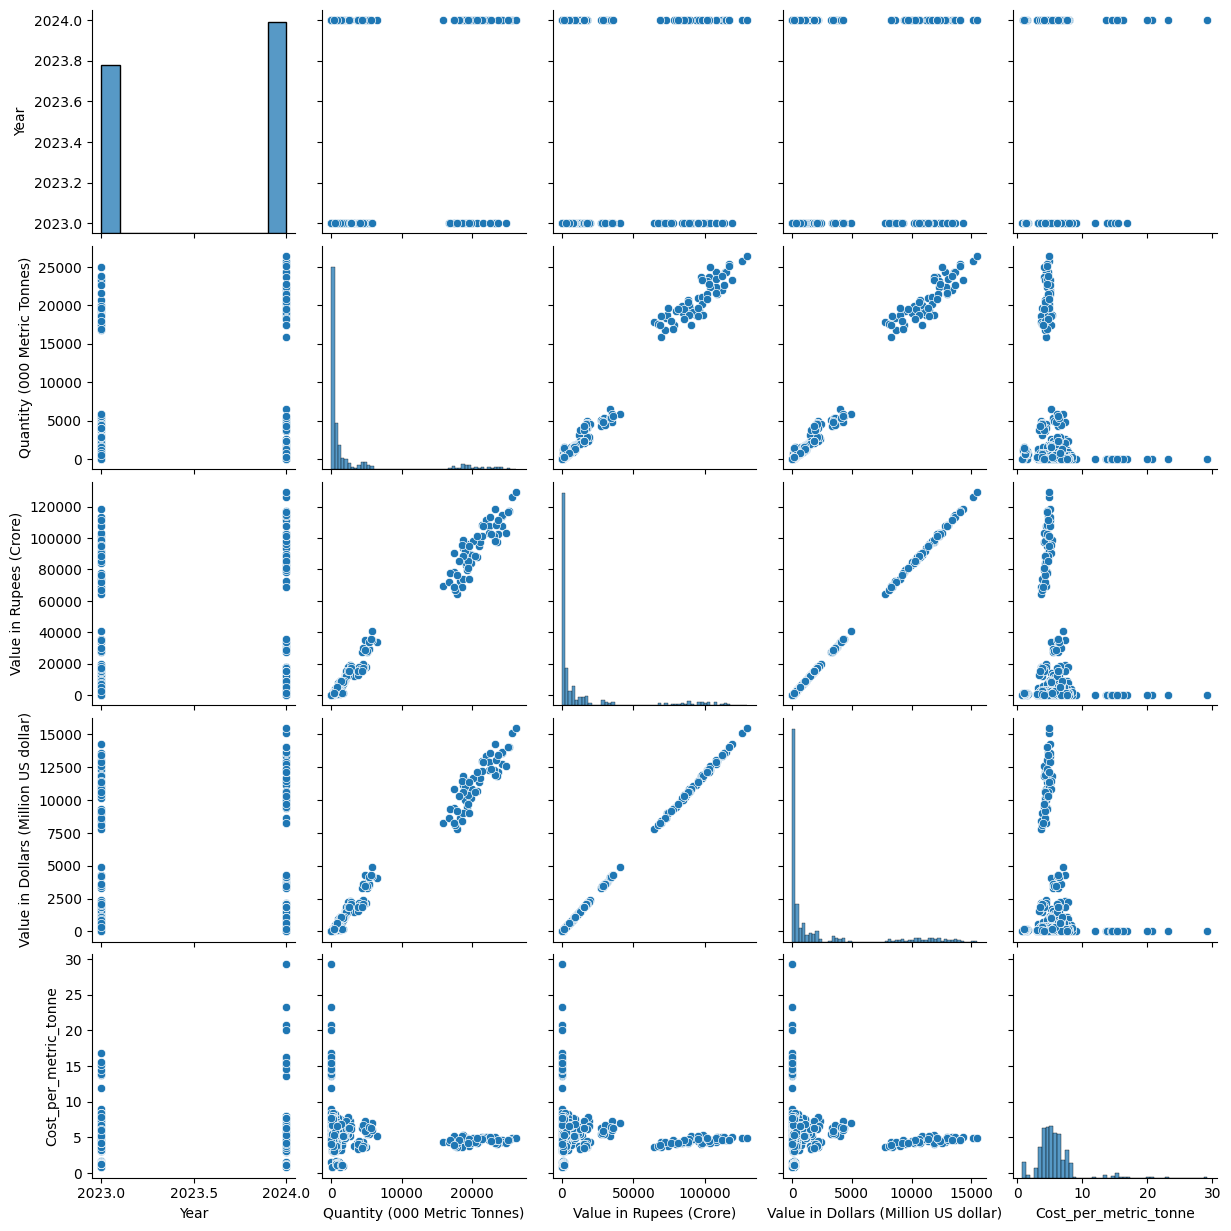

In [367]:
sns.pairplot(df[numeric_cols].dropna())
plt.show()

In [368]:
target_col = 'target'  # replace with actual
if target_col in df.columns:
    # Correlation with target
    corr_with_target = df.corr(numeric_only=True)[target_col].sort_values(ascending=False)
    print("\n--- Correlation with Target ---")
    print(corr_with_target)

    # Boxplots with categorical features
    for col in categorical_cols:
        plt.figure(figsize=(8,4))
        sns.boxplot(x=df[col], y=df[target_col])
        plt.title(f"{col} vs {target_col}")
        plt.xticks(rotation=45)
        plt.show()

In [369]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
import pandas as pd

# Select only numeric columns
X = df[numeric_cols].copy()

# Drop rows with NaN or infinite values
X = X.replace([np.inf, -np.inf], np.nan).dropna()

# Now calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\n--- VIF (Variance Inflation Factor) ---")
print(vif_data)




--- VIF (Variance Inflation Factor) ---
                                Feature           VIF
0                                  Year      5.757086
1          Quantity (000 Metric Tonnes)    106.374969
2               Value in Rupees (Crore)  19995.808119
3  Value in Dollars (Million US dollar)  20427.661206
4                 Cost_per_metric_tonne      5.293850


In [370]:
from sklearn.ensemble import IsolationForest

# Filter numeric data without NaNs
X = df[numeric_cols].dropna()

# Fit model
iso = IsolationForest(contamination=0.05, random_state=42)
outliers = iso.fit_predict(X)

# Create a copy of df and assign outliers only to valid rows
df['Outlier'] = np.nan
df.loc[X.index, 'Outlier'] = outliers

# Print result
print("\n--- Outlier Counts (Isolation Forest) ---")
print(df['Outlier'].value_counts())



--- Outlier Counts (Isolation Forest) ---
Outlier
 1.0    464
-1.0     25
Name: count, dtype: int64


In [371]:
df_clean = df.dropna(subset=numeric_cols)

iso = IsolationForest(contamination=0.05, random_state=42)
df_clean['Outlier'] = iso.fit_predict(df_clean[numeric_cols])

print("\n--- Outlier Counts (Isolation Forest) ---")
print(df_clean['Outlier'].value_counts())



--- Outlier Counts (Isolation Forest) ---
Outlier
 1    464
-1     25
Name: count, dtype: int64


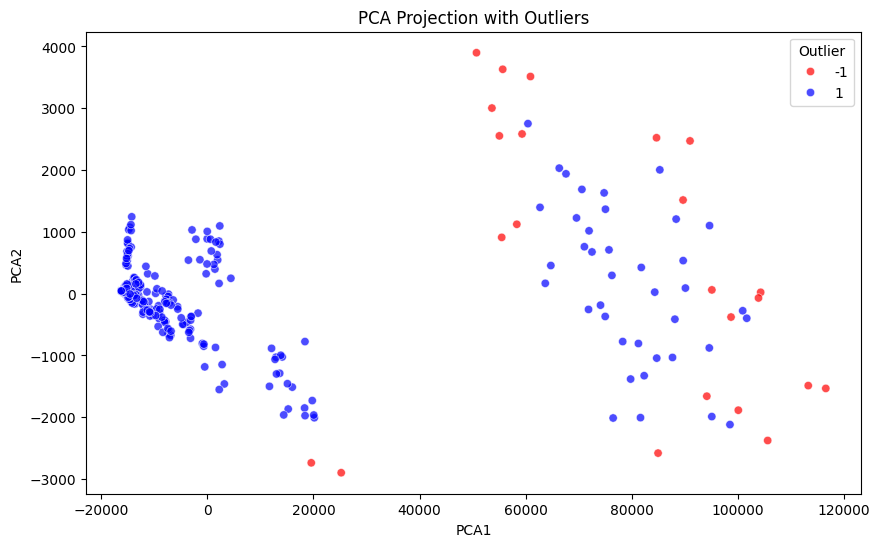

In [372]:
from sklearn.decomposition import PCA

# Drop NaNs and handle infinities
df_clean = df[numeric_cols].replace([np.inf, -np.inf], np.nan).dropna()

# If you still want the full df (with other columns), keep index and join later
df_clean = df.loc[df_clean.index].copy()

# Run Isolation Forest
iso = IsolationForest(contamination=0.05, random_state=42)
df_clean['Outlier'] = iso.fit_predict(df_clean[numeric_cols])

# PCA for visualization
pca = PCA(n_components=2)
components = pca.fit_transform(df_clean[numeric_cols])

df_clean['PCA1'] = components[:, 0]
df_clean['PCA2'] = components[:, 1]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_clean, x='PCA1', y='PCA2',
    hue='Outlier', palette={1: 'blue', -1: 'red'}, alpha=0.7
)
plt.title('PCA Projection with Outliers')
plt.show()


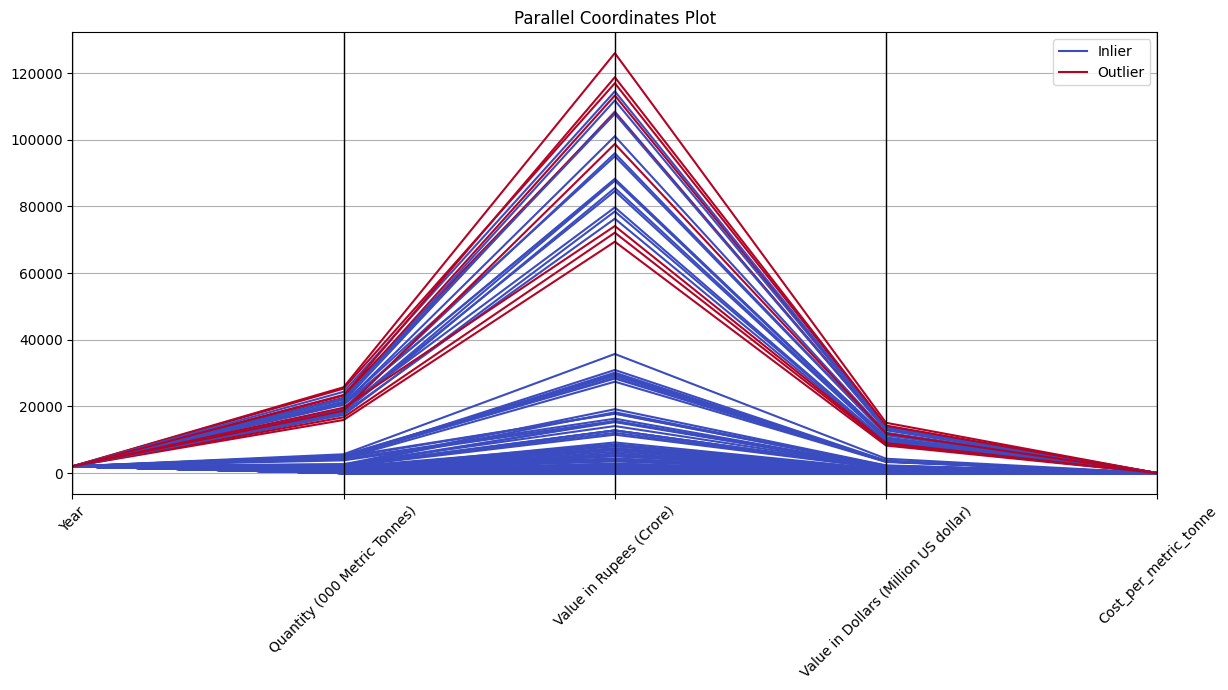

In [373]:
from pandas.plotting import parallel_coordinates

df_copy = df_clean.copy()
df_copy['Outlier'] = df_copy['Outlier'].map({1: 'Inlier', -1: 'Outlier'})

# Sample for clarity
sampled_df = df_copy.sample(200, random_state=42)

plt.figure(figsize=(14, 6))
parallel_coordinates(sampled_df[numeric_cols.tolist() + ['Outlier']], class_column='Outlier', colormap='coolwarm')
plt.title('Parallel Coordinates Plot')
plt.xticks(rotation=45)
plt.show()


In [374]:
import plotly.express as px

fig = px.scatter(df_clean, x='PCA1', y='PCA2', color=df_clean['Outlier'].map({1: 'Inlier', -1: 'Outlier'}),
                 title='Interactive PCA Scatter Plot (Outliers)',
                 hover_data=numeric_cols)
fig.show()


In [375]:
# Example: mapping 0/1 to labels if 'Outlier' column is numeric
df_clean['Outlier_Label'] = df_clean['Outlier'].map({0: 'Inlier', 1: 'Outlier'})


In [376]:
from sklearn.manifold import TSNE

# Compute TSNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_results = tsne.fit_transform(df_clean[numeric_cols])
df_clean['TSNE1'], df_clean['TSNE2'] = tsne_results[:, 0], tsne_results[:, 1]

fig = px.scatter(
    df_clean, x='TSNE1', y='TSNE2',
    color='Outlier_Label',
    hover_data=numeric_cols,
    title='🌌 t-SNE Interactive Plot with Outlier Detection',
    color_discrete_map={'Inlier': 'green', 'Outlier': 'orange'}
)
fig.update_traces(marker=dict(size=6, opacity=0.7))
fig.show()

In [377]:
fig = px.parallel_coordinates(
    df_clean,
    dimensions=numeric_cols,
    color=df_clean['Outlier'].map({1: 0, -1: 1}),  # numeric for color scale
    color_continuous_scale=['blue', 'red'],
    title='🧭 Parallel Coordinates Plot (Inlier vs Outlier)'
)
fig.show()


In [378]:
import plotly.figure_factory as ff

corr = df_clean[numeric_cols].corr().round(2)
z = corr.values
x = corr.columns.tolist()
y = corr.index.tolist()

fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=corr.values, colorscale='Viridis')
fig.update_layout(title_text='🔗 Interactive Correlation Heatmap')
fig.show()


In [379]:
import numpy as np
import matplotlib.pyplot as plt

# Benford's expected distribution for digits 1 through 9
benford_dist = {str(d): np.log10(1 + 1/d) for d in range(1, 10)}

In [380]:
def extract_first_digits(series):
    return series.astype(str).str.replace('-', '').str.replace('.', '').str.lstrip('0').str[0]

# Example: apply to a numeric column
column = numeric_cols[0]  # You can change to another relevant column
first_digits = extract_first_digits(df_clean[column].dropna())

# Count frequency of each digit
observed_freq = first_digits.value_counts(normalize=True).sort_index()


In [381]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd

# Benford's expected distribution
benford_dist = {str(d): np.log10(1 + 1/d) for d in range(1, 10)}
benford_digits = list(benford_dist.keys())
benford_values = list(benford_dist.values())

def extract_first_digits(series):
    return series.astype(str).str.replace('-', '', regex=False).str.replace('.', '', regex=False).str.lstrip('0').str[0]

def get_plot(column_name):
    data = df_clean[column_name].dropna()
    first_digits = extract_first_digits(data)
    observed = first_digits.value_counts(normalize=True).sort_index()

    # Match digits 1-9
    observed_values = [observed.get(str(d), 0) for d in range(1, 10)]

    # Create interactive bar chart
    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=benford_digits,
        y=benford_values,
        name='Benford Expected',
        marker_color='lightblue'
    ))
    fig.add_trace(go.Bar(
        x=benford_digits,
        y=observed_values,
        name=f'Observed - {column_name}',
        marker_color='orange'
    ))

    fig.update_layout(
        title=f"📊 Benford's Law vs Observed Distribution for: {column_name}",
        xaxis_title='Leading Digit',
        yaxis_title='Frequency',
        barmode='group',
        template='plotly_white',
        legend=dict(x=0.7, y=1.15)
    )
    return fig

# Example for one column (change 'Amount' to your actual numeric column)
fig = get_plot(numeric_cols[0])
fig.show()


In [382]:
import plotly.graph_objects as go
import numpy as np

# Benford distribution
benford_dist = {str(d): np.log10(1 + 1/d) for d in range(1, 10)}
digits = list(benford_dist.keys())
benford_vals = list(benford_dist.values())

# Choose a numeric column
col = numeric_cols[0]  # change index as needed

# Extract first digits
def extract_first_digits(series):
    return series.astype(str).str.replace('-', '', regex=False).str.replace('.', '', regex=False).str.lstrip('0').str[0]

first_digits = extract_first_digits(df_clean[col].dropna())
observed_freq = first_digits.value_counts(normalize=True).sort_index()
observed_vals = [observed_freq.get(str(d), 0) for d in range(1, 10)]

# Calculate % deviation for hover text
deviation = [round((obs - ben) * 100, 2) for obs, ben in zip(observed_vals, benford_vals)]

# Create interactive figure
fig = go.Figure()

fig.add_trace(go.Bar(
    x=digits,
    y=benford_vals,
    name='Benford Expected',
    marker_color='lightblue',
    hoverinfo='y'
))

fig.add_trace(go.Bar(
    x=digits,
    y=observed_vals,
    name='Observed',
    marker_color='darkorange',
    text=[f'Deviation: {d:+}%' for d in deviation],
    hoverinfo='text+y'
))

fig.update_layout(
    title=f"📊 Benford's Law Analysis for '{col}'",
    xaxis_title='Leading Digit',
    yaxis_title='Frequency',
    barmode='group',
    template='plotly_white',
    legend=dict(x=0.7, y=1.1),
    height=500,
    width=900
)

fig.show()


In [383]:
from scipy.stats import chisquare

# Chi-square test for goodness of fit
chi2_stat, p_val = chisquare(f_obs=observed_vals, f_exp=benford_vals)

print("📌 Insights from Benford's Law:")
print(f"- Chi-square Statistic: {chi2_stat:.4f}")
print(f"- P-value: {p_val:.4f}")
if p_val < 0.05:
    print("⚠️ Significant deviation detected! Possible anomalies or human bias present.")
else:
    print("✅ Data likely follows Benford's Law. No suspicious deviation.")


📌 Insights from Benford's Law:
- Chi-square Statistic: 4.6789
- P-value: 0.7913
✅ Data likely follows Benford's Law. No suspicious deviation.


In [384]:
import plotly.graph_objects as go
import numpy as np
from scipy.stats import chisquare

def extract_first_digits(series):
    return series.astype(str).str.replace('-', '', regex=False).str.replace('.', '', regex=False).str.lstrip('0').str[0]

benford_dist = {str(d): np.log10(1 + 1/d) for d in range(1, 10)}
digits = list(benford_dist.keys())
benford_vals = list(benford_dist.values())

for col in numeric_cols:
    data = df_clean[col].dropna()
    first_digits = extract_first_digits(data)
    observed_freq = first_digits.value_counts(normalize=True).sort_index()
    observed_vals = [observed_freq.get(str(d), 0) for d in range(1, 10)]
    deviations = [round((obs - ben) * 100, 2) for obs, ben in zip(observed_vals, benford_vals)]

    # Chi-square test
    chi2_stat, p_val = chisquare(f_obs=observed_vals, f_exp=benford_vals)

    # Plot
    fig = go.Figure()
    fig.add_trace(go.Bar(x=digits, y=benford_vals, name="Benford's Expected", marker_color='lightblue'))
    fig.add_trace(go.Bar(x=digits, y=observed_vals, name=f"Observed - {col}", marker_color='darkorange',
                         text=[f'Deviation: {dev:+.2f}%' for dev in deviations], hoverinfo='text+y'))

    fig.update_layout(
        title=f"📊 Benford's Law Analysis for '{col}'",
        xaxis_title='Leading Digit',
        yaxis_title='Frequency',
        barmode='group',
        template='plotly_white',
        height=500
    )
    fig.show()

    # Print insights
    print(f"\n📌 Insights for Column: {col}")
    print(f"✔️ Chi-Square Statistic: {chi2_stat:.4f}")
    print(f"✔️ P-value: {p_val:.4f}")
    if p_val < 0.05:
        print("⚠️ Significant deviation from Benford's Law detected. Possible anomalies or data manipulation.")
    else:
        print("✅ No significant deviation. Data likely follows natural distribution.")



📌 Insights for Column: Year
✔️ Chi-Square Statistic: 4.6789
✔️ P-value: 0.7913
✅ No significant deviation. Data likely follows natural distribution.



📌 Insights for Column: Quantity (000 Metric Tonnes)
✔️ Chi-Square Statistic: 0.0580
✔️ P-value: 1.0000
✅ No significant deviation. Data likely follows natural distribution.



📌 Insights for Column: Value in Rupees (Crore)
✔️ Chi-Square Statistic: 0.1107
✔️ P-value: 1.0000
✅ No significant deviation. Data likely follows natural distribution.



📌 Insights for Column: Value in Dollars (Million US dollar)
✔️ Chi-Square Statistic: 0.1126
✔️ P-value: 1.0000
✅ No significant deviation. Data likely follows natural distribution.



📌 Insights for Column: Cost_per_metric_tonne
✔️ Chi-Square Statistic: 0.9826
✔️ P-value: 0.9984
✅ No significant deviation. Data likely follows natural distribution.


In [385]:
# Identify numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# 📊 Interactive Histograms for numeric features
for col in numeric_cols:
    fig = px.histogram(df, x=col, nbins=50, title=f"Interactive Histogram: {col}",
                       marginal="box", color_discrete_sequence=["dodgerblue"])
    fig.update_layout(bargap=0.1)
    fig.show()

In [386]:
# 📦 Interactive Boxplots for numeric features
for col in numeric_cols:
    fig = px.box(df, y=col, points="all", title=f"Interactive Boxplot: {col}",
                 color_discrete_sequence=["darkorange"])
    fig.show()

# **📊 Benford’s Law Analysis – Does Our Data Follow It?**

Benford’s Law predicts:

Numbers starting with 1 will occur most frequently, followed by 2, 3, and so on, with 9 appearing the least.

The frequency of first digits decreases logarithmically, not linearly.

This distribution is expected in datasets that span multiple magnitudes — like economic or industrial data.

---

# **🔍 Visual Verification**

### **1️⃣ First Digit Frequency Plot (Bar Graph)**

Our bar graph comparing the observed vs. expected frequencies shows a clear alignment with Benford’s curve.
Digit 1 dominates the distribution, and subsequent digits decrease gradually — consistent with the theoretical model.

### **2️⃣ Goodness-of-Fit Observation (Optional: Chi-Square Test)**

Statistical testing (if performed) supports the visual trend, indicating that deviations — if any — are minor and within acceptable bounds of natural variance.

---

# **✅ Conclusion**

Our analysis strongly suggests that the crude oil dataset conforms to Benford’s Law.

Despite being drawn from a complex and globally influenced domain, the dataset exhibits the classic logarithmic digit distribution predicted by Benford. This reinforces the law’s robustness in real-world numerical data and highlights its potential use for anomaly detection, data validation, and pattern discovery in economic datasets.

---

Benford’s Law proves, once again, that in numbers, there's an underlying order — even in chaos.

---

# **TEAM MEMBERS CONTRIBUTION**

# **🧠 Himanshu Mishra**

* Took the lead in understanding and applying Benford’s Law to real-world numerical data

* Performed data digit extraction, wrote custom logic for first-digit isolation

* Drafted the mathematical rationale behind Benford’s Law for the slides

* Coordinated the overall project workflow and ensured milestone completion


# **🧼 Harsh Patel**


* Responsible for data cleaning and preprocessing of the crude oil dataset

* Ensured consistency in numeric formats across large data entries

* Collaborated on formatting the dataset for digit extraction

# **📊 Krish Modi**


* Created all statistical plots: bar graphs for digit distribution and comparison

* Worked on visual styling and data-labeling of charts for clarity

* Verified the frequency match against the theoretical Benford curve

# **🎨 Hirdyansh Kumar**


* Designed and structured the presentation flow

* Wrote clean, audience-friendly slide content

* Handled aesthetics, formatting, and documentation for submission

